In [29]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

In [30]:
print(tf.__version__)
print(np.__version__)
import platform
print(platform.python_version())


2.13.1
1.24.3
3.8.2


In [31]:
# Load your data
df = pd.read_csv('model/saved-files/synthetic_homework_data.csv')

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Problem Set']),
        ('cat', OneHotEncoder(), ['Subject']),
        ('ord', OrdinalEncoder(), ['Priority'])
    ])


In [32]:
# Splitting the data
X = df.drop('Time Required to Finish', axis=1)
y = df['Time Required to Finish']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [33]:
X_train_transformed.shape[1]

10

In [34]:
# Neural Network Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train_transformed.shape[1]]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
# Fit the model
# Fit the model and record the history


history = model.fit(X_train_transformed, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100


2023-11-30 15:17:38.690520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-30 15:17:38.718900: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


40/40 [==============================] - 1s 21ms/step - loss: 119363.0391 - val_loss: 125431.7656
Epoch 2/100
 1/40 [..............................] - ETA: 0s - loss: 133380.3438

2023-11-30 15:17:39.599111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 18ms/step - loss: 116236.2734 - val_loss: 120570.2891
Epoch 3/100
40/40 [==============================] - 1s 18ms/step - loss: 108743.6016 - val_loss: 109334.8984
Epoch 4/100
40/40 [==============================] - 1s 19ms/step - loss: 94242.5781 - val_loss: 90194.0859
Epoch 5/100
40/40 [==============================] - 1s 18ms/step - loss: 73372.2031 - val_loss: 66483.7344
Epoch 6/100
40/40 [==============================] - 1s 17ms/step - loss: 51136.8320 - val_loss: 44842.4297
Epoch 7/100
40/40 [==============================] - 1s 19ms/step - loss: 34062.5352 - val_loss: 30378.1504
Epoch 8/100
40/40 [==============================] - 1s 18ms/step - loss: 24479.7305 - val_loss: 23233.3379
Epoch 9/100
40/40 [==============================] - 1s 18ms/step - loss: 20125.2148 - val_loss: 19788.7930
Epoch 10/100
40/40 [==============================] - 1s 18ms/step - loss: 17447.1406 - val_loss: 17350.7969
Epoch 11/100
40/40 [===============

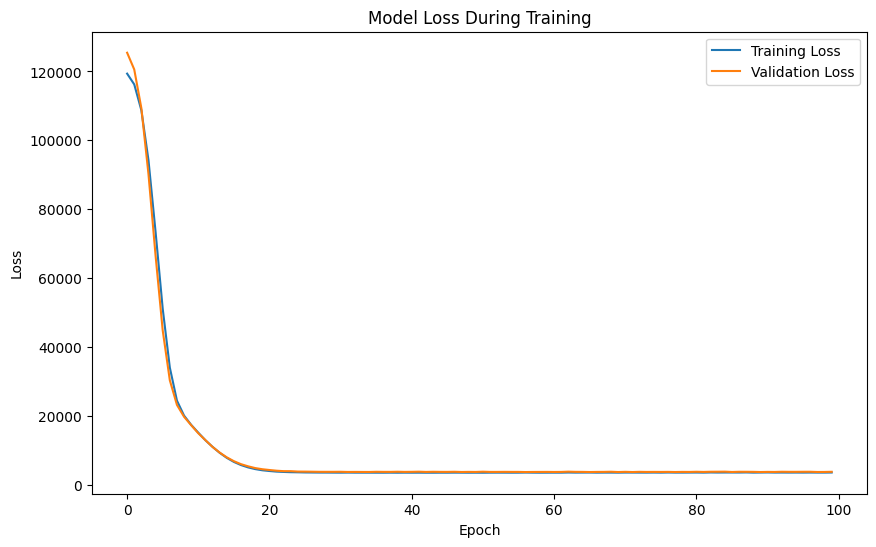

In [36]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Make predictions on the test set
y_pred = model.predict(X_test_transformed)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

13/13 [==============================] - 0s 7ms/step
Mean Absolute Error (MAE): 48.915028613805774
Mean Squared Error (MSE): 4074.862616232397
R-squared Score: 0.8332730589757912


2023-11-30 15:19:05.377559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [38]:
import pickle


In [39]:
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)

In [40]:
model_save_path = 'model-v-0-1'
model.save(model_save_path)

INFO:tensorflow:Assets written to: model-v-0-1/assets


INFO:tensorflow:Assets written to: model-v-0-1/assets


In [41]:
model_save_path = 'model.keras'
model.save(model_save_path)

In [27]:
# model.save_weights('prelim_weights.h5')

###Testing if our model is correct

In [50]:
input_data = pd.DataFrame([["Physics50", 0, "Low"]], columns=['Subject', 'Problem Set', 'Priority'])
processed_input_data = preprocessor.transform(input_data)
print(processed_input_data)
model.predict(processed_input_data)

[[-3.38163711  0.          0.          0.          0.          0.
   0.          1.          0.          1.        ]]
1/1 [==============================] - 0s 20ms/step


array([[-123.54361]], dtype=float32)